# BAN 612-02 Zillow Project

## Group 4 - Aman Solanki, Krishna Jaideep Patel, Farzad Emami, Deepak Dileepkumar

Python ipynb file that clearly shows the procedure of analyzing, data visualization,  or any relevant content to explore and answer the research questions. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
pd.set_option('display.max_columns',5000)
pd.set_option('display.max_rows',5000)

#imputing, scale and partition
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split

#regression models
from dmba import regressionSummary #might have to pip install dmba
from sklearn.linear_model import Ridge, LassoCV
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Google Maps API
import googlemaps
from datetime import datetime

In [ ]:
z4 = pd.read_csv('Zillow-CleanedData.csv')

In [ ]:
z4 = z4[['Address','State', 'Zestimate', 'Listing-Company','Link',
         'Price', 'City', 'ZipCode', 'Bedrooms','HOA', 'Living-Area',
         'Total-Bathrooms', 'Garage-Spaces', 'Home-Type','Year-Built',
         'Utilities', 'Sunscore', 'Annual-Tax', 'Tax-Value']]

In [ ]:
z4.head(2)

,Address,State,Zestimate,Listing-Company,Link,Price,City,ZipCode,Bedrooms,HOA,Living-Area,Total-Bathrooms,Garage-Spaces,Home-Type,Year-Built,Utilities,Sunscore,Annual-Tax,Tax-Value
0,"2863 S Bascom Ave APT 808, Campbell, CA 95008",CA,603718,COMPASS,https://www.zillow.com/homedetails/2863-S-Basc...,599000,Campbell,95008,2,445.0,841.0,2,0,Condo,1984,Public Utilities,95.26,7168.0,532888.0
1,"6035 Admiralty Pl, San Jose, CA 95123",CA,919331,GOLDEN GATE SOTHEBY'S,https://www.zillow.com/homedetails/6035-Admira...,895000,San Jose,95123,3,117.0,1328.0,3,0,Single Family,1994,Public Utilities,81.65,8062.0,590585.0


In [ ]:
z4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          1072 non-null   object 
 1   State            1072 non-null   object 
 2   Zestimate        1072 non-null   int64  
 3   Listing-Company  1072 non-null   object 
 4   Link             1072 non-null   object 
 5   Price            1072 non-null   int64  
 6   City             1072 non-null   object 
 7   ZipCode          1072 non-null   int64  
 8   Bedrooms         1072 non-null   int64  
 9   HOA              1072 non-null   float64
 10  Living-Area      1072 non-null   float64
 11  Total-Bathrooms  1072 non-null   int64  
 12  Garage-Spaces    1072 non-null   int64  
 13  Home-Type        1072 non-null   object 
 14  Year-Built       1072 non-null   int64  
 15  Utilities        1072 non-null   object 
 16  Sunscore         1072 non-null   float64
 17  Annual-Tax    

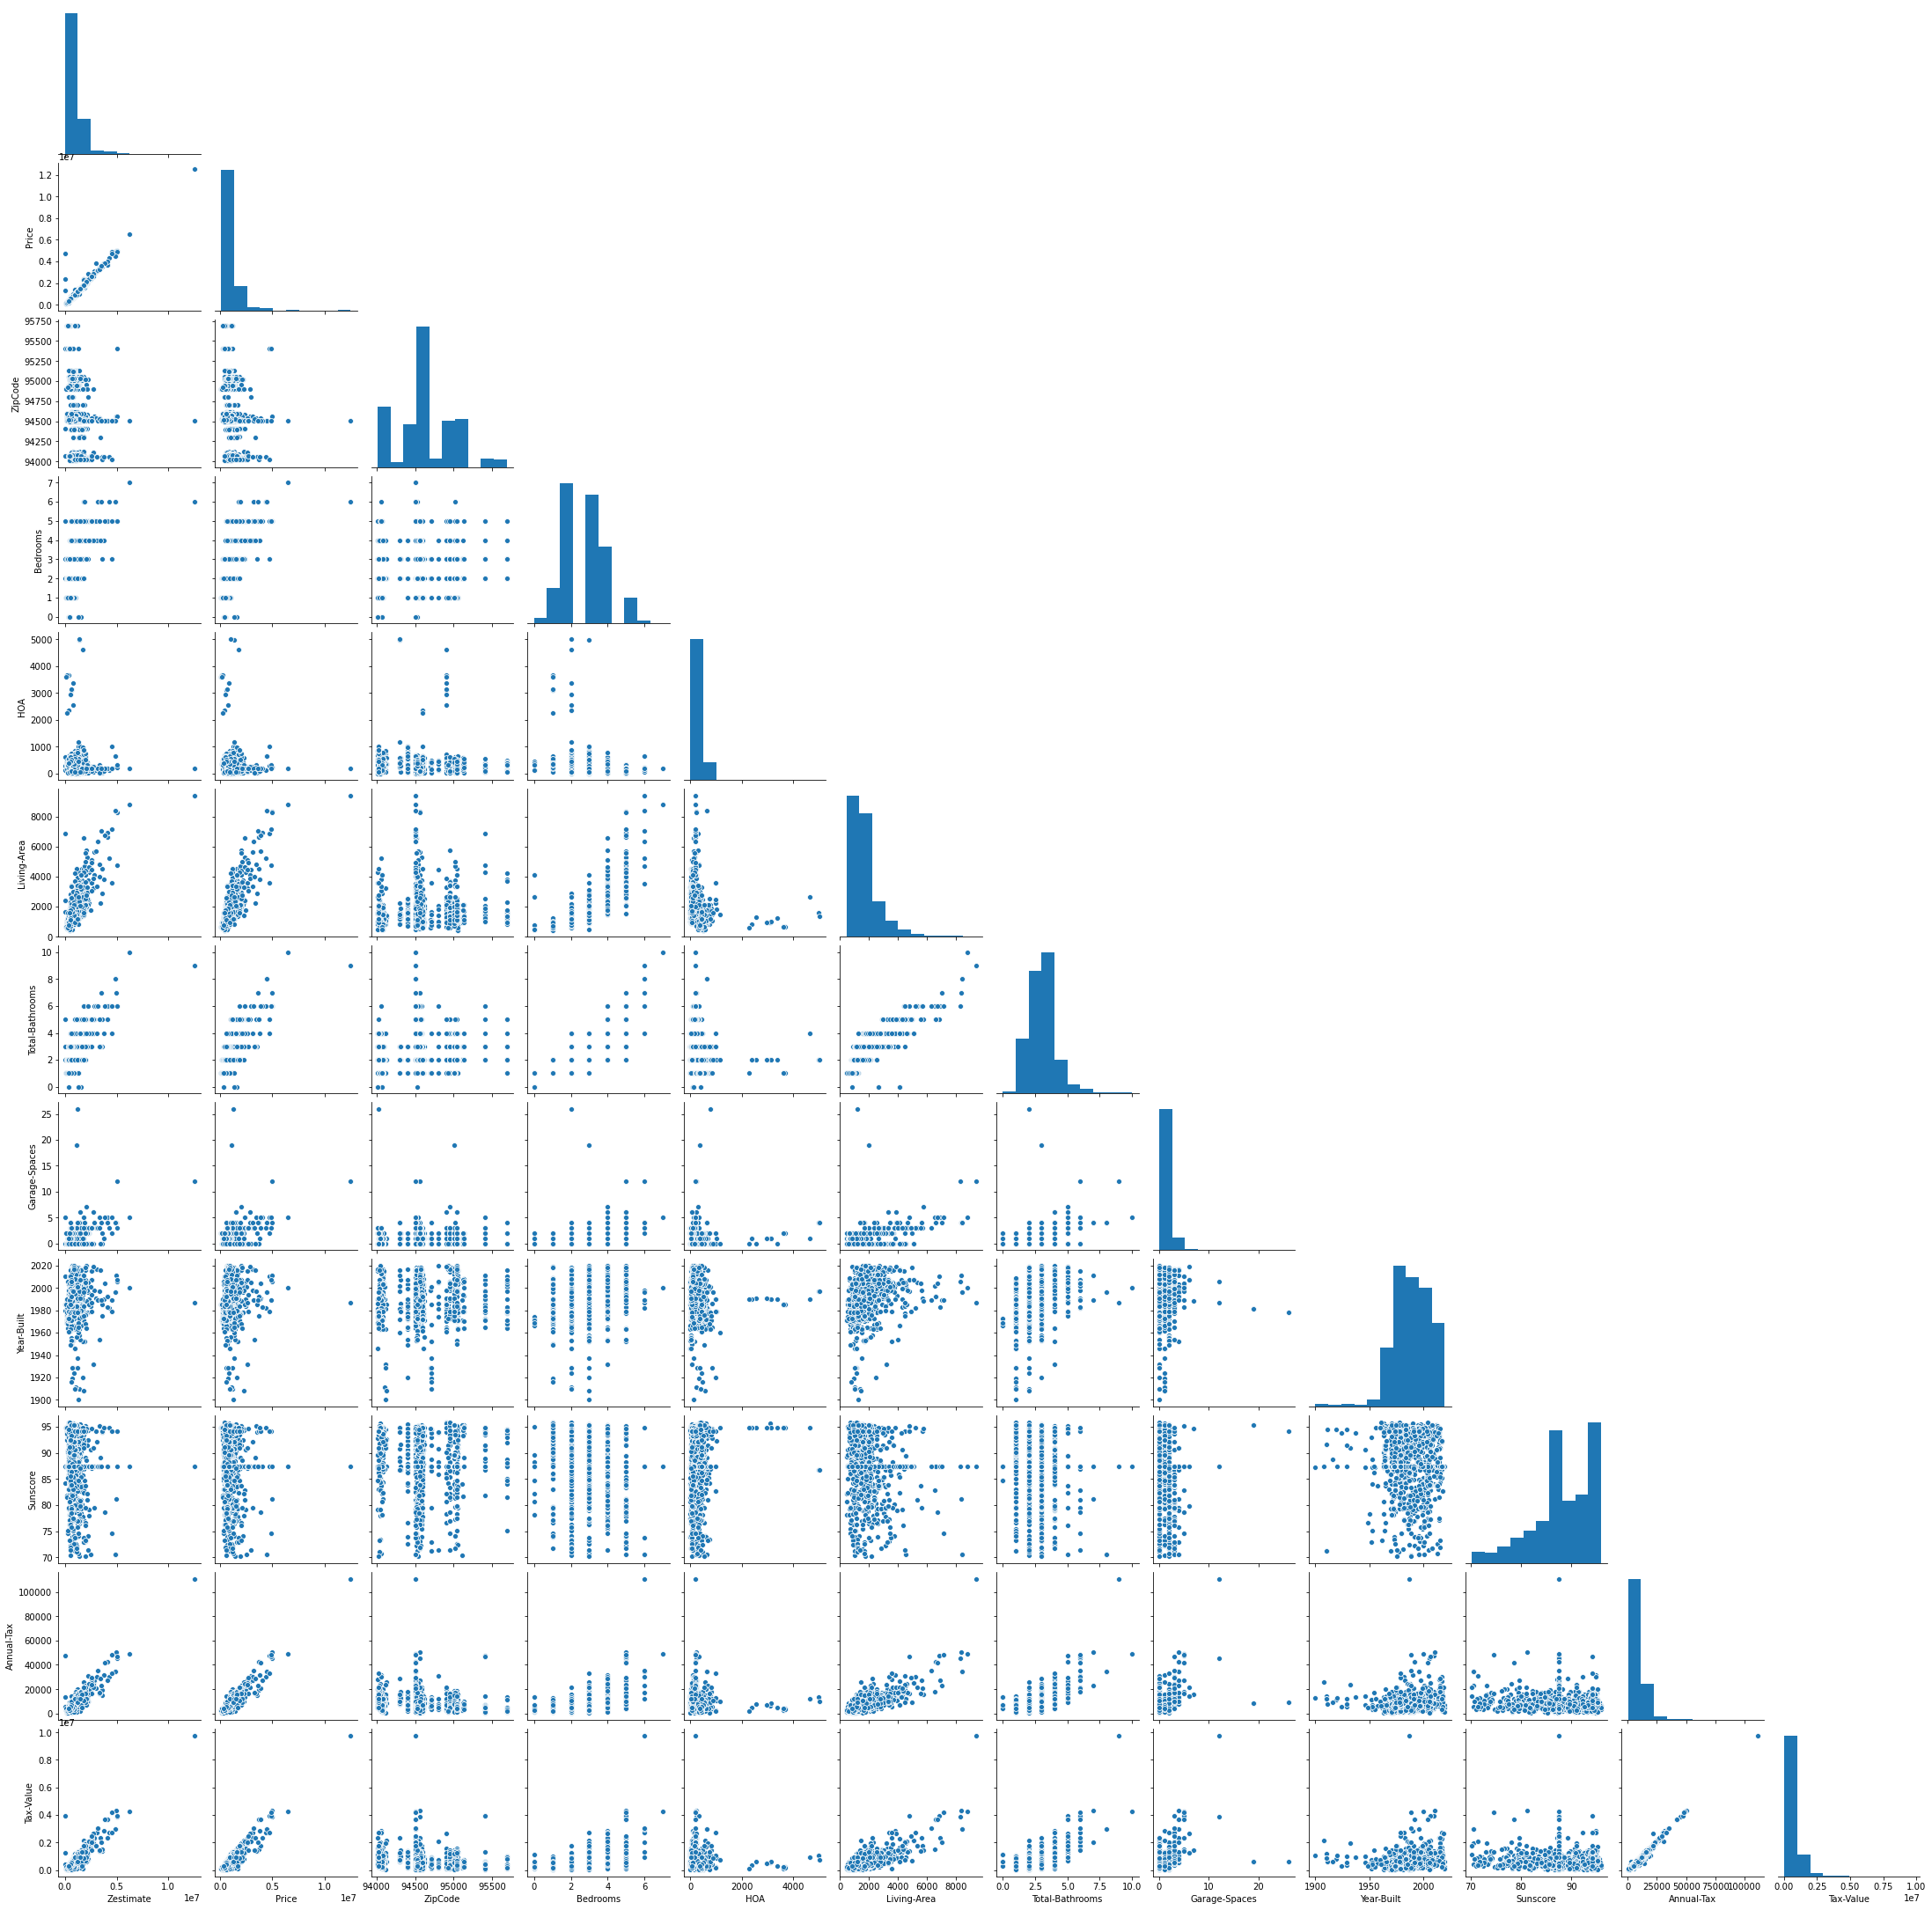

In [ ]:
sns.pairplot(z4, corner=True)
plt.savefig('Pairplot.png')

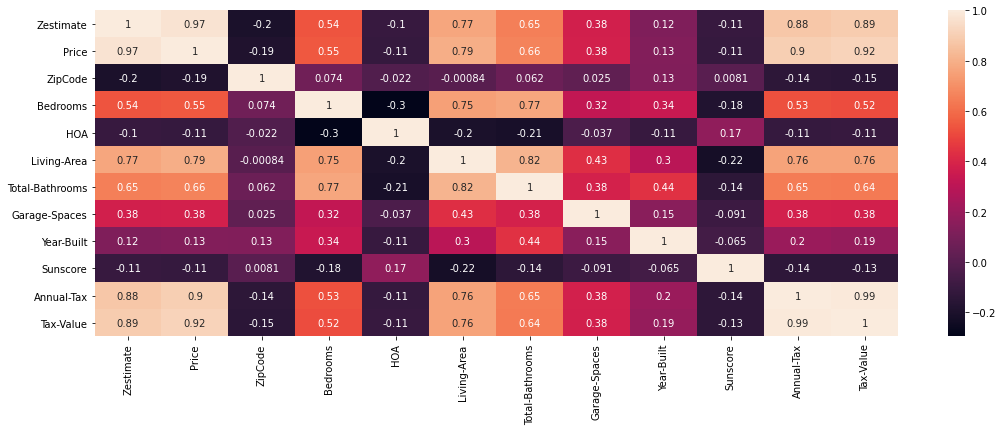

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(z4.corr(),annot=True)
plt.savefig('Correlation_Heatmap.png')

#### Research Question 1

# Building Regression Model to predict Listing price and then comparing it with Zestimate.

### Preparing Data for Regression Model

In [ ]:
dummyCity = pd.get_dummies(z4['City'], prefix_sep='City_', drop_first=False)
z4=pd.concat([z4, dummyCity], axis=1)

dummyHomeType = pd.get_dummies(z4['Home-Type'], prefix_sep='Type_', drop_first=False)
z4=pd.concat([z4, dummyHomeType], axis=1)

dummyUtilities = z4['Utilities'].str.get_dummies(sep=',')
z4=pd.concat([z4, dummyUtilities], axis=1)

dummyZipCode = pd.get_dummies(z4['ZipCode'], prefix_sep='Type_', drop_first=False)
z4=pd.concat([z4, dummyZipCode], axis=1)

In [ ]:
z4 = z4.drop(['City'],axis=1)
z4 = z4.drop(['Home-Type'],axis=1)
z4 = z4.drop(['Utilities'],axis=1)
z4 = z4.drop(['ZipCode'],axis=1)

In [ ]:
z4.head(2)

,Address,State,Zestimate,Listing-Company,Link,Price,Bedrooms,HOA,Living-Area,Total-Bathrooms,Garage-Spaces,Year-Built,Sunscore,Annual-Tax,Tax-Value,Alameda,Antioch,Atherton,Bay Point,Berkeley,Brentwood,Campbell,Castro Valley,Concord,Cupertino,Daly City,Danville,Dublin,East Palo Alto,Fairfield,Foster City,Fremont,Gilroy,Half Moon Bay,Hayward,Livermore,Martinez,Menlo Park,Milpitas,Morgan Hill,Mountain View,Napa,Novato,Oakland,Oakley,Pacheco,Pacifica,Palo Alto,Petaluma,Pittsburg,Pleasant Hill,Pleasanton,Redwood City,Richmond,Rohnert Park,San Bruno,San Francisco,San Jose,San Leandro,San Lorenzo,San Mateo,San Pablo,San Rafael,San Ramon,Santa Clara,Santa Rosa,South San Francisco,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Condo,Mobile / Manufactured,Multiple Occupancy,Other,Single Family,Townhouse,All Electric,All Public,Available - Not On Site,Cable Available,Cable Connected,Electricity Connected,Individual Electric Meters,Individual Gas Meters,Master Meter,Natural Gas,Natural Gas Connected,Other,Other-Rmks,Propane On Site,Public Utilities,Sewer Connected,Solar Panels - Leased,Solar Panels - Owned,Water Connected,Unknown,94014,94015,94019,94025,94027,94040,94041,94043,94044,94061,94062,94063,94065,94066,94080,94085,94086,94087,94089,94107,94109,94114,94115,94116,94117,94122,94123,94124,94301,94303,94306,94401,94402,94403,94404,94501,94502,94506,94509,94513,94518,94519,94520,94521,94523,94526,94531,94533,94534,94536,94538,94539,94541,94542,94544,94545,94546,94550,94551,94553,94555,94558,94559,94561,94565,94566,94568,94577,94578,94579,94580,94582,94583,94587,94588,94589,94590,94591,94595,94596,94597,94598,94605,94607,94608,94610,94611,94618,94619,94702,94703,94704,94705,94708,94709,94801,94803,94804,94901,94903,94928,94945,94947,94949,94952,94954,95008,95014,95020,95035,95037,95050,95051,95054,95111,95116,95123,95125,95126,95127,95128,95129,95132,95133,95134,95135,95401,95403,95404,95405,95407,95409,95687,95688
0,"2863 S Bascom Ave APT 808, Campbell, CA 95008",CA,603718,COMPASS,https://www.zillow.com/homedetails/2863-S-Basc...,599000,2,445.0,841.0,2,0,1984,95.26,7168.0,532888.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"6035 Admiralty Pl, San Jose, CA 95123",CA,919331,GOLDEN GATE SOTHEBY'S,https://www.zillow.com/homedetails/6035-Admira...,895000,3,117.0,1328.0,3,0,1994,81.65,8062.0,590585.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split Data for training, validation and testing

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(z4.iloc[:,6:])

df_scaled=pd.DataFrame(scaler.transform(z4.iloc[:,6:]), columns=z4.columns[6:])

X = df_scaled #predictor variables
y = z4['Price'] #outcome variable

#training (50%), validation (30%), and test (20%) partition
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.4, random_state=1)

print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

Training :  (536, 226)
Validation :  (321, 226)
Test :  (215, 226)


#### Ridge Regression Model

In [ ]:
# train Ridge regression model
reg2 = Ridge(normalize=True, alpha=1.0)
reg2.fit(train_X, train_y)

pred_ridge = reg2.predict(test_X)

#performance metrics
print('Training:')
regressionSummary(train_y, reg2.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, reg2.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, reg2.predict(test_X))

print('\n')
print('For Ridge Regression Model, we got an accuracy of',(reg2.score(test_X,test_y)*100),'%')

Training:

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 237805.6406
            Mean Absolute Error (MAE) : 150935.5633
          Mean Percentage Error (MPE) : -8.0498
Mean Absolute Percentage Error (MAPE) : 17.4546


Validation:

Regression statistics

                      Mean Error (ME) : -2548.8198
       Root Mean Squared Error (RMSE) : 407774.5926
            Mean Absolute Error (MAE) : 168333.1053
          Mean Percentage Error (MPE) : -8.7459
Mean Absolute Percentage Error (MAPE) : 17.5069


Testing:

Regression statistics

                      Mean Error (ME) : 44861.2881
       Root Mean Squared Error (RMSE) : 369762.7880
            Mean Absolute Error (MAE) : 207222.7814
          Mean Percentage Error (MPE) : -7.5952
Mean Absolute Percentage Error (MAPE) : 20.5475


For Ridge Regression Model, we got an accuracy of 79.2008805796215 %


#### Least Angle Regression Model

In [ ]:
# train Least Angle Regression Model
reg3 = linear_model.LassoLars(max_iter=8)
reg3.fit(train_X, train_y)

pred_leastAngle = reg3.predict(test_X)

#performance metrics
print('Training:')
regressionSummary(train_y, reg3.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, reg3.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, reg3.predict(test_X))

print('\n')
print('For Least Angle Regression Model, we got an accuracy of',(reg3.score(test_X,test_y)*100),'%')

Training:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 236620.6689
            Mean Absolute Error (MAE) : 172531.5415
          Mean Percentage Error (MPE) : -7.5514
Mean Absolute Percentage Error (MAPE) : 20.6709


Validation:

Regression statistics

                      Mean Error (ME) : -12366.6461
       Root Mean Squared Error (RMSE) : 310136.4345
            Mean Absolute Error (MAE) : 180419.3605
          Mean Percentage Error (MPE) : -8.9335
Mean Absolute Percentage Error (MAPE) : 20.8757


Testing:

Regression statistics

                      Mean Error (ME) : 40737.9804
       Root Mean Squared Error (RMSE) : 316369.5800
            Mean Absolute Error (MAE) : 202659.4505
          Mean Percentage Error (MPE) : -6.4935
Mean Absolute Percentage Error (MAPE) : 21.6483


For Least Angle Regression Model, we got an accuracy of 84.77392450426152 %


#### Random Forest Model

In [ ]:
#finding appropriate hyperparameters
clf = AdaBoostRegressor(RandomForestRegressor(max_depth=8,min_samples_split=3,
                                                min_samples_leaf=1,max_samples=0.7,
                                                max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}

gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

rfc = gridSearch.best_estimator_

print(rfc)

Improved parameters:  {}
AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=8,
                                                       max_features=8,
                                                       max_samples=0.7,
                                                       min_samples_split=3,
                                                       random_state=1),
                  n_estimators=100, random_state=1)


In [ ]:
rfc = RandomForestRegressor(max_depth=8, max_features=8,
                            max_samples=0.7, min_samples_split=3,
                            random_state=1)

rfc.fit(train_X,train_y)

pred_rfc = rfc.predict(test_X)

#performance metrics
print('Training:')
regressionSummary(train_y, rfc.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, rfc.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, rfc.predict(test_X))

print('\n')
print('For Random Forest Model, we got an accuracy of',(rfc.score(test_X,test_y)*100),'%')

Training:

Regression statistics

                      Mean Error (ME) : -790.7620
       Root Mean Squared Error (RMSE) : 307502.4795
            Mean Absolute Error (MAE) : 225216.0090
          Mean Percentage Error (MPE) : -19.4041
Mean Absolute Percentage Error (MAPE) : 32.4249


Validation:

Regression statistics

                      Mean Error (ME) : 5484.5436
       Root Mean Squared Error (RMSE) : 607022.8537
            Mean Absolute Error (MAE) : 252064.5580
          Mean Percentage Error (MPE) : -20.1376
Mean Absolute Percentage Error (MAPE) : 32.0187


Testing:

Regression statistics

                      Mean Error (ME) : 60776.6324
       Root Mean Squared Error (RMSE) : 506033.8628
            Mean Absolute Error (MAE) : 315631.1915
          Mean Percentage Error (MPE) : -20.0346
Mean Absolute Percentage Error (MAPE) : 38.1996


For Random Forest Model, we got an accuracy of 61.045493841075945 %


### Model Comparisons

In [ ]:
modelEvaluation = pd.DataFrame()

modelEvaluation['Price'] = test_y
modelEvaluation['Least Angle Regression'] = pred_leastAngle.astype(int)
modelEvaluation['Random Forest'] = pred_rfc.astype(int)
modelEvaluation['Ridge Regression'] = pred_ridge.astype(int)

In [ ]:
zestimateModelComparison=[]

for i in modelEvaluation.index:
    zestimateModelComparison.append(z4['Zestimate'][i]) #get zestimate for the records in the test set

In [ ]:
modelEvaluation['Zestimate'] = zestimateModelComparison #add Zestimate to the dataframe

In [ ]:
modelEvaluation.head()

,Price,Least Angle Regression,Random Forest,Ridge Regression,Zestimate
1017,2650000,2856645,2404015,2587368,2539235
411,1388000,889778,966880,1212489,1419589
1053,500000,715985,955293,627382,500375
12,949000,1050367,983655,962254,973567
858,690000,779653,720359,731773,690106


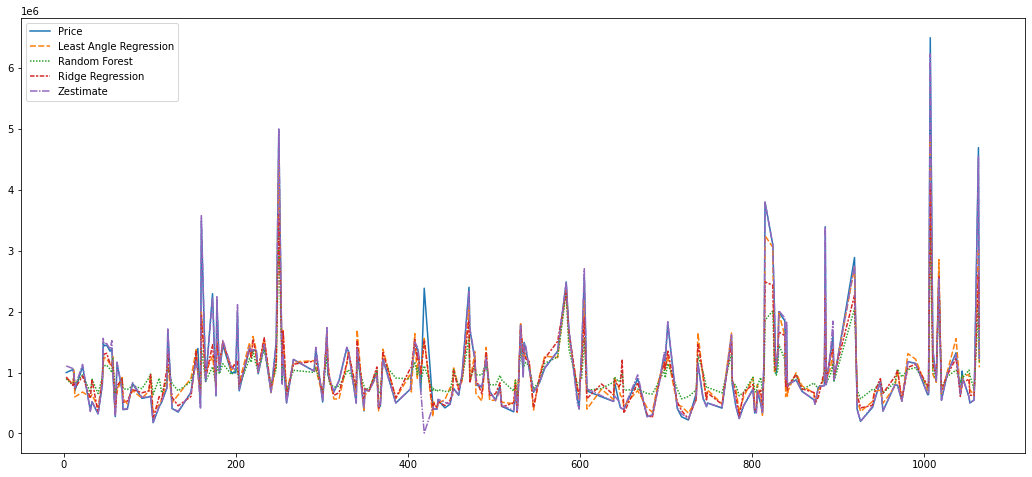

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(data=modelEvaluation)
plt.savefig('Zestimate_Model_Comparison.png')

In [ ]:
print('Comparing Model with Zestimate:')
print('For Ridge Regression Model, we got an accuracy of',(reg2.score(test_X,test_y)*100),'%')
print('For Least Angle Regression Model, we got an accuracy of',(reg3.score(test_X,test_y)*100),'%')
print('For Random Forest Model, we got an accuracy of',(rfc.score(test_X,test_y)*100),'%')

Comparing Model with Zestimate:
For Ridge Regression Model, we got an accuracy of 79.2008805796215 %
For Least Angle Regression Model, we got an accuracy of 84.77392450426152 %
For Random Forest Model, we got an accuracy of 61.045493841075945 %


In [ ]:
print('Comparing Model with Listing Price:')
print('For Ridge Regression Model, we got an accuracy of',(reg2.score(test_X,zestimateModelComparison)*100),'%')
print('For Least Angle Regression Model, we got an accuracy of',(reg3.score(test_X,zestimateModelComparison)*100),'%')
print('For Random Forest Model, we got an accuracy of',(rfc.score(test_X,zestimateModelComparison)*100),'%')

Comparing Model with Listing Price:
For Ridge Regression Model, we got an accuracy of 78.01585944138178 %
For Least Angle Regression Model, we got an accuracy of 83.16374899606312 %
For Random Forest Model, we got an accuracy of 60.83631057357126 %


#### Research Question 2

# How much money can a real estate company can potentially make in the Bay Area?

In [ ]:
z5 = pd.read_csv('Zillow-CleanedData.csv')
z5 = z5[['Listing-Company', 'Price']]

listingGroup = z5.groupby('Listing-Company').sum()
listingProperties = z5.groupby('Listing-Company').count()

a = listingGroup.sort_values(by='Price', ascending=False)
b = listingProperties.sort_values(by='Price', ascending=False)

In [ ]:
top10listingCompanies = a.head(10)

In [ ]:
top10listingCompanies['Properties'] = b
#error can be ignored

<ipython-input-5-4b86d271f726>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10listingCompanies['Properties'] = b


In [ ]:
top10listingCompanies

,Price,Properties
Listing-Company,,
COMPASS,225307469,189
COLDWELL BANKER,93802173,104
INTERO REAL ESTATE SERVICES,62803490,58
KELLER WILLIAMS,59036205,59
RE/MAX,30388218,45
GOLDEN GATE SOTHEBY'S,27492900,23
REDFIN,23843552,27
BERKSHIRE HATHAWAY,20667521,22
BETTER HOMES,15560788,17


#### Potential Revenue (assuming they sell the listed properties at asking price)

### ' Standard Real Estate Commission is 2.5% to 3%' 
source : https://www.zillow.com/agent-resources/blog/how-do-real-estate-agents-get-paid/

In [ ]:
commission = top10listingCompanies['Price']*0.025

tempList = []
for i in commission:
    tempList.append(i)
    
top10listingCompanies['Commission'] = tempList

#error can be ignored

<ipython-input-7-89a76515ef5f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10listingCompanies['Commission'] = tempList


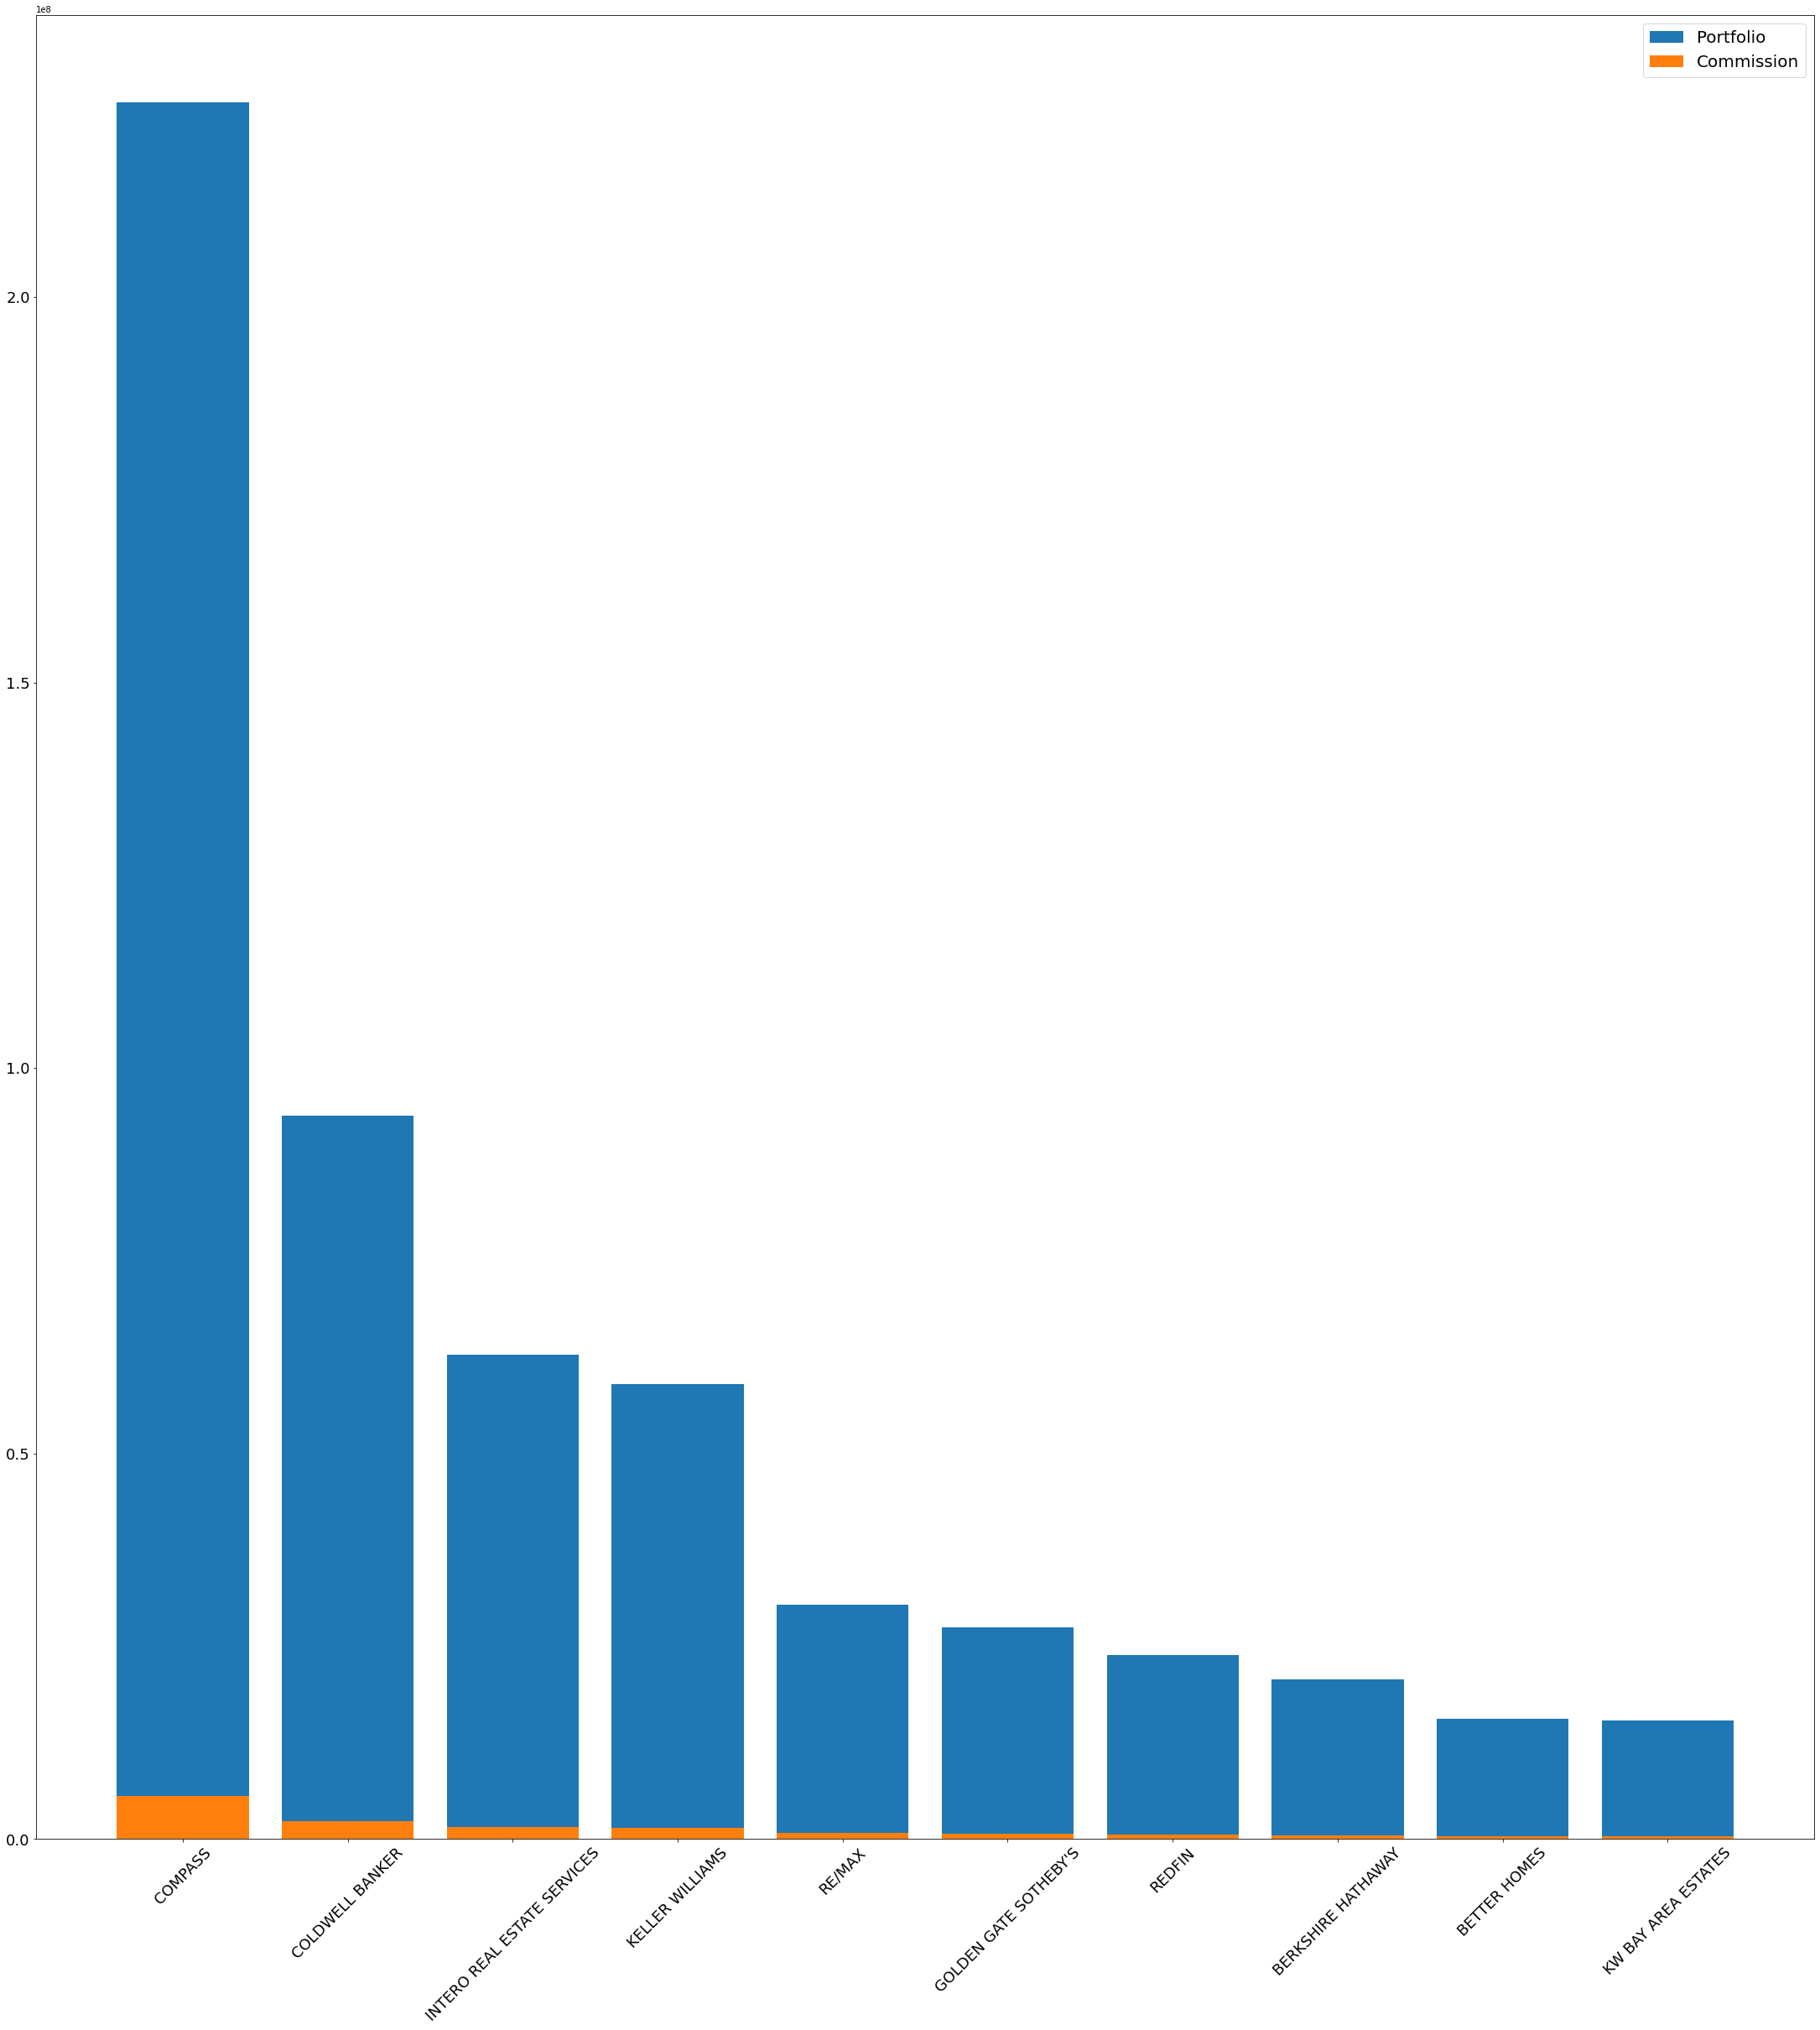

In [ ]:
plt.figure(figsize=(38,40))
labellist=['$0', '$500,000', '$1 million', '$1.5 million', '2.0 million']

plt.bar(top10listingCompanies.index, top10listingCompanies['Price'], label='Portfolio')
plt.bar(top10listingCompanies.index, top10listingCompanies['Commission'], label='Commission')
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=20)

plt.savefig('Real_Estate1.png')

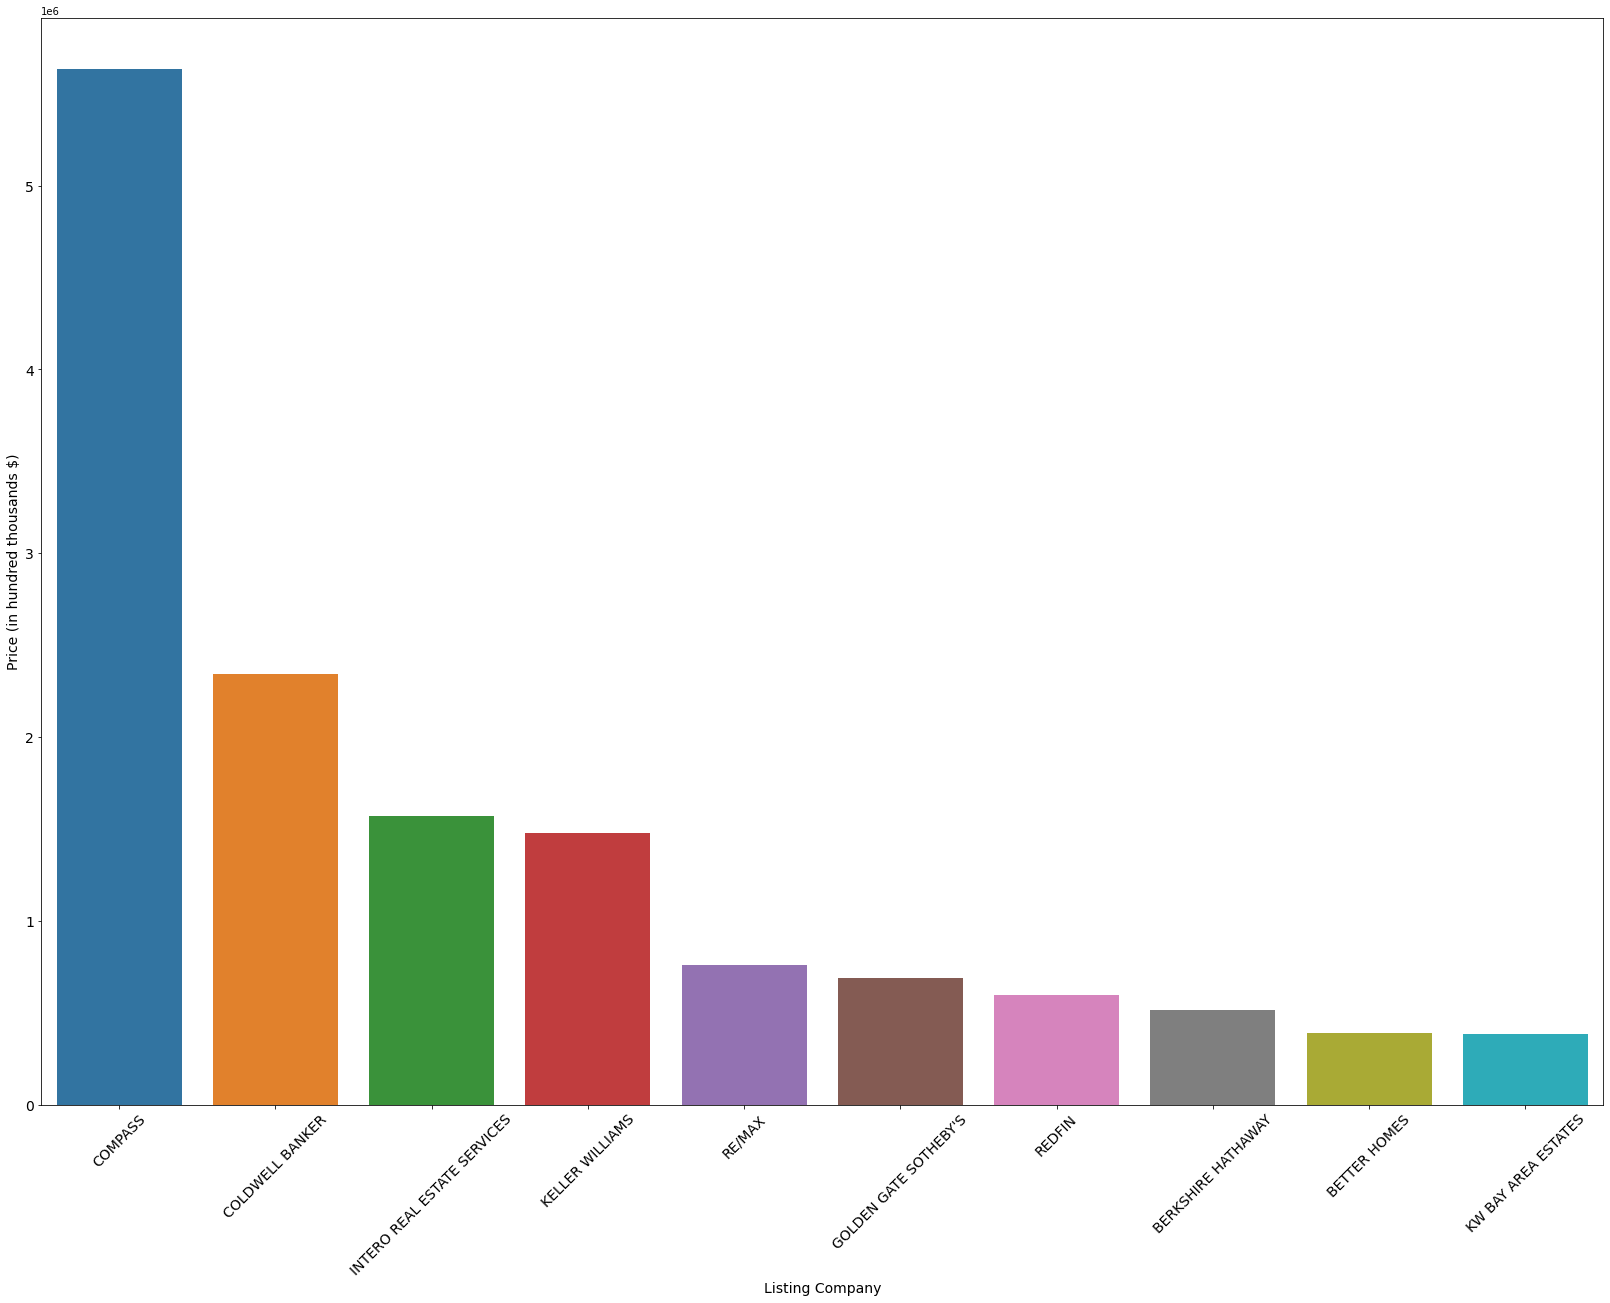

In [ ]:
plt.figure(figsize=(28,20))
sns.barplot(top10listingCompanies.index, top10listingCompanies['Commission'])
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Listing Company', fontsize=14)
plt.ylabel('Price (in hundred thousands $)', fontsize=14)

plt.savefig('Real_Estate2.png')

In [ ]:
top10listingCompanies

,Price,Properties,Commission
Listing-Company,,,
COMPASS,225307469,189,5632686.725
COLDWELL BANKER,93802173,104,2345054.325
INTERO REAL ESTATE SERVICES,62803490,58,1570087.250
KELLER WILLIAMS,59036205,59,1475905.125
RE/MAX,30388218,45,759705.450
GOLDEN GATE SOTHEBY'S,27492900,23,687322.500
REDFIN,23843552,27,596088.800
BERKSHIRE HATHAWAY,20667521,22,516688.025
BETTER HOMES,15560788,17,389019.700


#### Research Question 3

# Is real estate market near San Francisco International Airport more expensive?

In [ ]:
z6 = pd.read_csv('Zillow-CleanedData.csv')

In [ ]:
z6 = z6[['Address','Price', 'City', 'Bedrooms', 'Living-Area', 'Total-Bathrooms', 'Home-Type']]

In [ ]:
z6 = z6.head(450)

In [ ]:
gmaps = googlemaps.Client(key='myAPIkey') #removed intentionally

durationList=[]
distanceList=[]

for i in range(len(z6['Address'])):
    directions={}
    now = datetime.now()
    directions = gmaps.directions(z6['Address'][i],"San Francisco International Airport",
                                     mode="driving",
                                     departure_time=now)
    distanceList.append(str(directions[0]['legs'][0]['distance']['text']))
    durationList.append(str(directions[0]['legs'][0]['duration']['text']))

In [ ]:
z6['Distance'] = distanceList[:450]
z6['Duration'] = durationList[:450]

In [ ]:
z6.to_csv("Zillow-addToSFO2.csv") #export data to csv

In [ ]:
z6.head()

,Address,Price,City,Bedrooms,Living-Area,Total-Bathrooms,Home-Type,Distance,Duration
0,"2863 S Bascom Ave APT 808, Campbell, CA 95008",599000,Campbell,2,841.0,2,Condo,38.5,39 mins
1,"6035 Admiralty Pl, San Jose, CA 95123",895000,San Jose,3,1328.0,3,Single Family,42.7,42 mins
2,"761 Bonita Pl, San Jose, CA 95116",642888,San Jose,3,1231.0,3,Townhouse,36.5,37 mins
3,"100 Ballatore Ct, San Jose, CA 95134",999900,San Jose,3,1405.0,3,Townhouse,30.4,32 mins
4,"2664 Senter Rd APT 221, San Jose, CA 95111",550000,San Jose,2,1026.0,2,Condo,40.1,41 mins


In [ ]:
z6['Distance'] = z6['Distance'].str.replace(' mi', '', regex=True)

z6['Distance'] = pd.to_numeric(z6['Distance']) 

In [ ]:
z6 = pd.read_csv('Zillow-addToSFO2.csv')

In [ ]:
z6.head(10)

,Unnamed: 0,Address,Price,City,Bedrooms,Living-Area,Total-Bathrooms,Home-Type,Distance,Duration
0,0,"2863 S Bascom Ave APT 808, Campbell, CA 95008",599000,Campbell,2,841.0,2,Condo,38.5,39 mins
1,1,"6035 Admiralty Pl, San Jose, CA 95123",895000,San Jose,3,1328.0,3,Single Family,42.7,42 mins
2,2,"761 Bonita Pl, San Jose, CA 95116",642888,San Jose,3,1231.0,3,Townhouse,36.5,37 mins
3,3,"100 Ballatore Ct, San Jose, CA 95134",999900,San Jose,3,1405.0,3,Townhouse,30.4,32 mins
4,4,"2664 Senter Rd APT 221, San Jose, CA 95111",550000,San Jose,2,1026.0,2,Condo,40.1,41 mins
5,5,"3106 Capewood Ln, San Jose, CA 95132",1299000,San Jose,5,2110.0,4,Single Family,35.9,38 mins
6,6,"3633 Jasmine Cir, San Jose, CA 95135",699000,San Jose,2,1037.0,2,Condo,44.4,46 mins
7,7,"242 Jersey St, San Francisco, CA 94114",1249000,San Francisco,3,1232.0,1,Condo,11.1,16 mins
8,8,"168 Dorantes Ave, San Francisco, CA 94116",2575000,San Francisco,4,3216.0,4,Single Family,11.7,17 mins
9,9,"2257 Fulton St, San Francisco, CA 94117",1199000,San Francisco,2,1350.0,2,Condo,14.0,20 mins


In [ ]:
z6.sort_values(by='Distance', ascending=True)

,Unnamed: 0,Address,Price,City,Bedrooms,Living-Area,Total-Bathrooms,Home-Type,Distance,Duration
310,310,"1488 El Camino Real UNIT 209, South San Franci...",929998,South San Francisco,2,990.0,2,Condo,1.9,6 mins
433,433,"1031 Cherry Ave APT 40, San Bruno, CA 94066",800000,San Bruno,3,1342.0,2,Condo,2.7,6 mins
432,432,"1126 Cherry Ave APT 80, San Bruno, CA 94066",435000,San Bruno,0,450.0,1,Condo,2.9,5 mins
317,317,"455 El Camino Real APT 405, South San Francisc...",599888,South San Francisco,1,730.0,1,Condo,3.2,6 mins
431,431,"402 Boardwalk Ave APT 19, San Bruno, CA 94066",540000,San Bruno,1,650.0,1,Condo,3.3,7 mins
429,429,"402 Boardwalk Ave APT 16, San Bruno, CA 94066",460000,San Bruno,0,450.0,1,Condo,3.3,7 mins
311,311,"85 Idlewood Ct, South San Francisco, CA 94080",1428000,South San Francisco,4,2150.0,3,Single Family,3.4,8 mins
435,435,"6153 Shelter Creek Ln, San Bruno, CA 94066",549000,San Bruno,1,680.0,1,Condo,4.1,6 mins
434,434,"2221 Shelter Creek Ln, San Bruno, CA 94066",399000,San Bruno,0,490.0,1,Condo,4.1,6 mins
437,437,"2146 Shelter Creek Ln, San Bruno, CA 94066",399000,San Bruno,0,490.0,1,Condo,4.2,7 mins


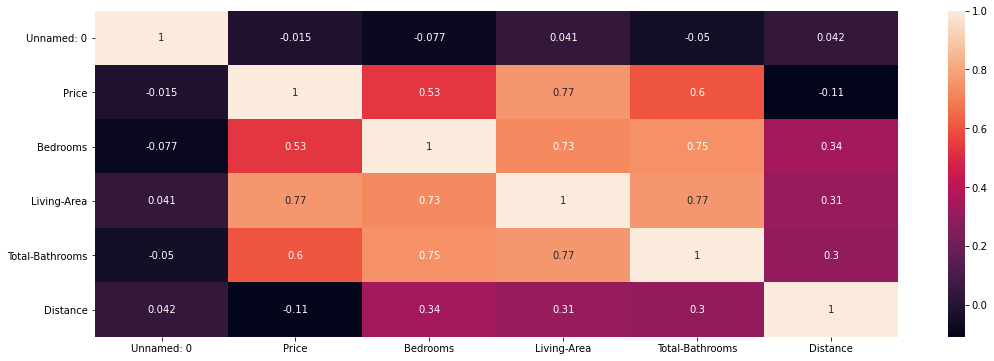

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(z6.corr(),annot=True)
plt.savefig('Correlation_Heatmap_Google.png')

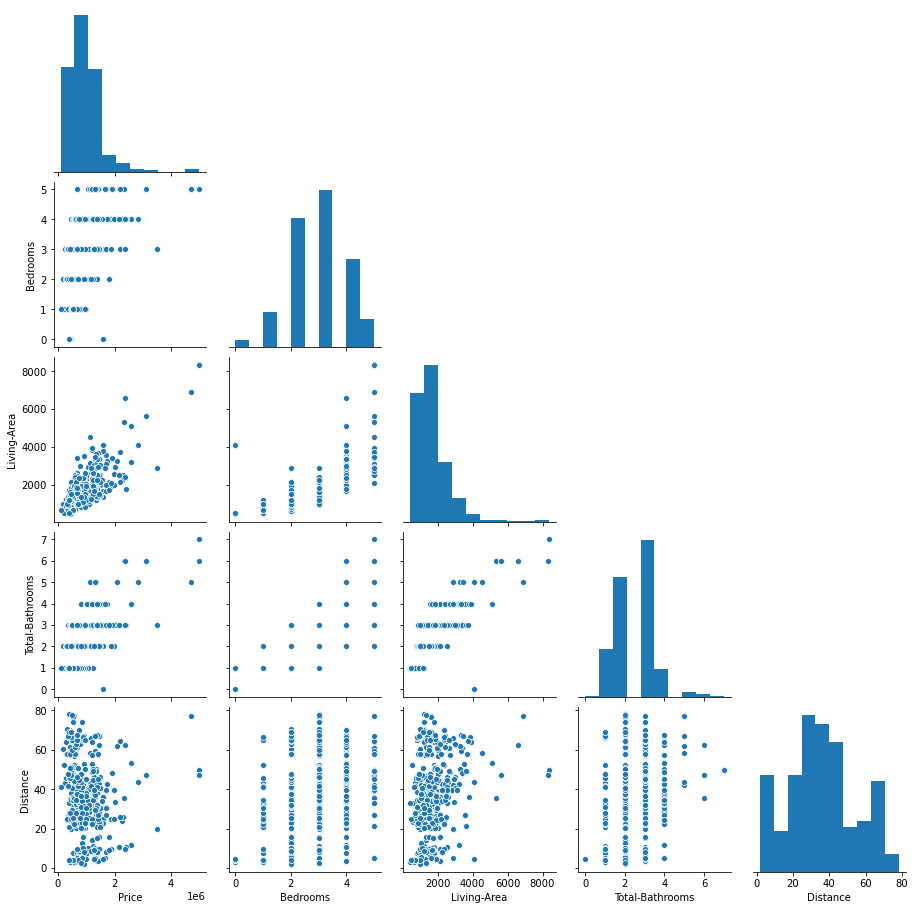

In [ ]:
sns.pairplot(z6, corner=True)
plt.savefig('Pairplot_Google.png')